# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from scipy.stats import linregress

#this function will allow me to get a list of cities which are nearest to a set of lat/longs i create
from citipy import citipy

# Google and weather API Keys
from api_keys import gkey, weather_api_key

## Generate Cities List

In [2]:
# first create a "random" set of lat/longs

lats = np.random.uniform(low = -90, high = 90, size = 750)
lngs = np.random.uniform(low = -180, high = 180, size = 750)

city = []
country = []

# now those lat/longs have to be in pairs to use the citipy function
lat_lng = zip(lats, lngs)

# run a loop calling citipy to get the nearest city to the lat/long created
for lat in lat_lng:
    city.append(citipy.nearest_city(lat[0], lat[1]).city_name)
    country.append(citipy.nearest_city(lat[0], lat[1]).country_code)

# create a list of all the data
cities_to_truncate = [city, country]   #, city_lat, city_lng

# make sure the cities are unique then cut the list to 500  
np.unique(cities_to_truncate)

cities = cities_to_truncate[0][:500]
countries = cities_to_truncate[1][:500] 

# i have a list of "random" cities to be able to use

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# create the base url and the lists which i'll be using to store data

base_url = 'http://api.openweathermap.org/data/2.5/weather?units=imperial'
city_lats = []
city_lngs = []
temps = []
humidities = []
cloudiness = []
wind_speeds = []
dates = []
count = 0

# loop through the data, call it through the api, then create lists of the needed data
for city in cities:
    try:
        url_string = (base_url + '&appid=' + weather_api_key + '&q=' + city)
        city_lat_lng = requests.get(url_string)
        weather_data = city_lat_lng.json()
        city_lats.append(weather_data['coord']['lat'])
        city_lngs.append(weather_data['coord']['lon'])
        temps.append(weather_data['main']['temp'])
        humidities.append(weather_data['main']['humidity'])
        cloudiness.append(weather_data['clouds']['all'])
        wind_speeds.append(weather_data['wind']['speed'])
        dates.append(weather_data['dt'])

    except:
        print("City not found")
        city_lats.append(0)
        city_lngs.append(0)
        temps.append(0)
        humidities.append(101)  #make the humidity over 100 to remove the city later
        cloudiness.append(0)
        wind_speeds.append(0)
        dates.append(0)

# print(json.dumps(weather_data, indent=2, sort_keys=True))



City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found
City not found


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_weather = {"City": cities,
                "Lat": city_lats,
                "Lng": city_lngs,
                "High Temp": temps,
                "Humidity": humidities,
                "Cloudiness": cloudiness,
                "Wind Speed": wind_speeds,
                "Country": countries,
                "Date": dates
               }
city_weather_df = pd.DataFrame(city_weather)
city_weather_df.head()


,City,Lat,Lng,High Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isangel,-19.55,169.27,80.02,74,30,14.92,vu,1602368675
1,harboore,56.62,8.18,45.03,59,85,18.43,dk,1602368675
2,tazovskiy,67.47,78.70,28.20,98,99,16.69,ru,1602368675
3,shaunavon,49.65,-108.42,77.92,16,19,16.58,ca,1602368675
4,tuatapere,-46.13,167.68,55.99,81,41,4.00,nz,1602368676


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
cities_more_100 = city_weather_df.loc[city_weather_df['Humidity']>100]
cities_more_100

,City,Lat,Lng,High Temp,Humidity,Cloudiness,Wind Speed,Country,Date
14,taolanaro,0.0,0.0,0.0,101,0,0.0,mg,0
15,barentsburg,0.0,0.0,0.0,101,0,0.0,sj,0
29,nizhneyansk,0.0,0.0,0.0,101,0,0.0,ru,0
40,haibowan,0.0,0.0,0.0,101,0,0.0,cn,0
78,palabuhanratu,0.0,0.0,0.0,101,0,0.0,id,0
98,imisli,0.0,0.0,0.0,101,0,0.0,az,0
103,sorvag,0.0,0.0,0.0,101,0,0.0,fo,0
129,taolanaro,0.0,0.0,0.0,101,0,0.0,mg,0
138,tawkar,0.0,0.0,0.0,101,0,0.0,sd,0
139,belushya guba,0.0,0.0,0.0,101,0,0.0,ru,0


In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = city_weather_df.loc[city_weather_df['Humidity']<=100]
clean_city_data.head()

,City,Lat,Lng,High Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isangel,-19.55,169.27,80.02,74,30,14.92,vu,1602368675
1,harboore,56.62,8.18,45.03,59,85,18.43,dk,1602368675
2,tazovskiy,67.47,78.70,28.20,98,99,16.69,ru,1602368675
3,shaunavon,49.65,-108.42,77.92,16,19,16.58,ca,1602368675
4,tuatapere,-46.13,167.68,55.99,81,41,4.00,nz,1602368676


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

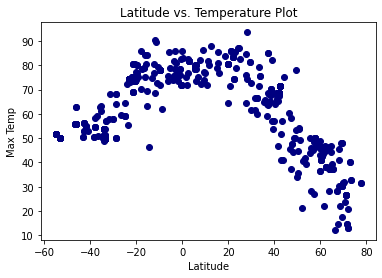

In [7]:
plt.scatter(clean_city_data['Lat'],clean_city_data['High Temp'],marker="o",color="navy")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.title('Latitude vs. Temperature Plot')

plt.show()

## Latitude vs. Humidity Plot

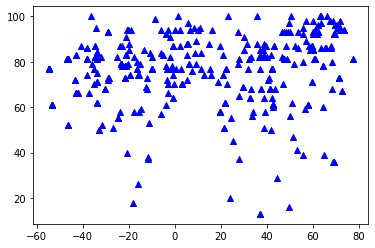

In [8]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'],marker="^",color="blue")

## Latitude vs. Cloudiness Plot

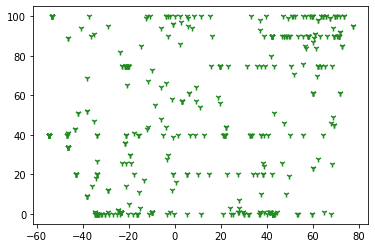

In [9]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'],marker="1",color="forestgreen")

## Latitude vs. Wind Speed Plot

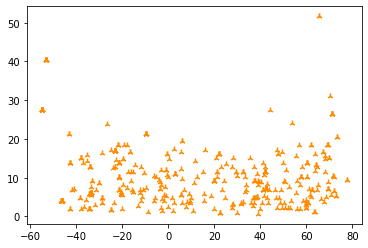

In [10]:
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'],marker="2",color="darkorange")

## Linear Regression

In [11]:
# start with dividing the data into northern and southern hemisphere

northern_data = clean_city_data.loc[clean_city_data['Lat'] >= 0]
southern_data = clean_city_data.loc[clean_city_data['Lat'] <= 0]
southern_data

,City,Lat,Lng,High Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,isangel,-19.55,169.27,80.02,74,30,14.92,vu,1602368675
4,tuatapere,-46.13,167.68,55.99,81,41,4.00,nz,1602368676
10,vaini,-21.20,-175.20,75.20,83,75,13.87,to,1602368677
12,port elizabeth,-33.92,25.57,53.60,71,40,5.82,za,1602368677
13,rikitea,-23.12,-134.97,74.30,79,1,16.91,pf,1602368434
...,...,...,...,...,...,...,...,...,...
491,sorong,-0.88,131.25,78.53,87,96,11.97,id,1602368680
492,ushuaia,-54.80,-68.30,51.80,77,40,27.51,ar,1602368418
495,bengkulu,-3.80,102.27,75.61,92,100,7.11,id,1602368757
498,rikitea,-23.12,-134.97,74.30,79,1,16.91,pf,1602368434


In [12]:
# create a linear regression function which creates the plots with the call

def lin_regression(x_values, y_values, mrkr, clr, ann_x, ann_y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values, marker=mrkr,color=clr)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(ann_x,ann_y),fontsize=15,color="black")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

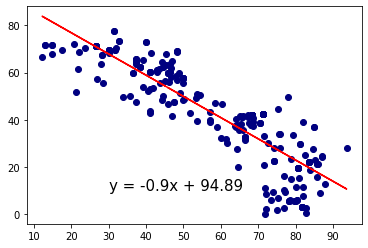

In [13]:
lin_regression(northern_data['High Temp'],northern_data['Lat'], 'o', 'navy', 30, 10)


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

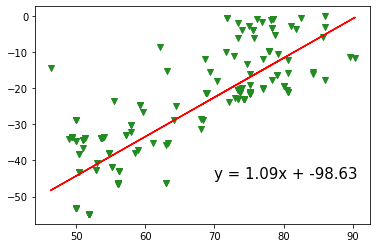

In [14]:
lin_regression(southern_data['High Temp'],southern_data['Lat'], 'v', 'forestgreen', 70, -45)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

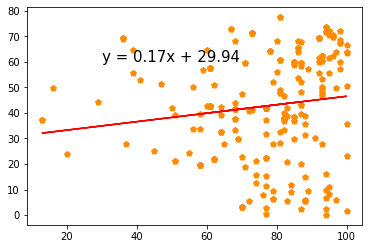

In [15]:
lin_regression(northern_data['Humidity'],northern_data['Lat'], 'p', 'darkorange', 30, 60)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

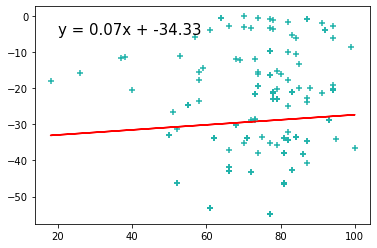

In [16]:
lin_regression(southern_data['Humidity'],southern_data['Lat'], '+', 'lightseagreen', 20, -5)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

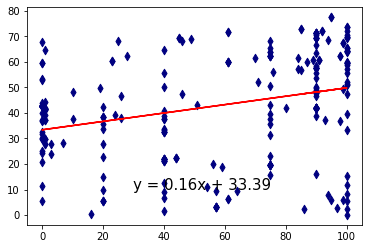

In [17]:
lin_regression(northern_data['Cloudiness'],northern_data['Lat'], 'd', 'navy', 30, 10)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

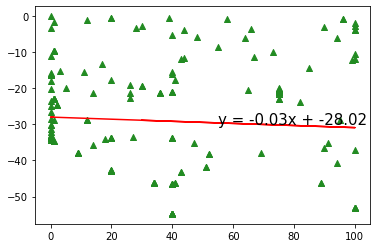

In [18]:
lin_regression(southern_data['Cloudiness'],southern_data['Lat'], '^', 'forestgreen', 55, -30)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

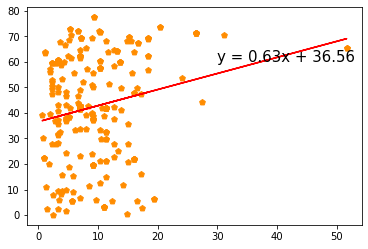

In [19]:
lin_regression(northern_data['Wind Speed'],northern_data['Lat'], 'p', 'darkorange', 30, 60)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

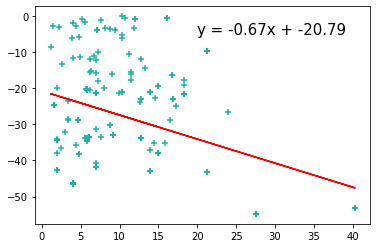

In [20]:
lin_regression(southern_data['Wind Speed'],southern_data['Lat'], '+', 'lightseagreen', 20, -5)